LOAN DEFAULT PREDICTION MODEL

In [8]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
!pip install streamlit

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   --------------------------------------- 413.4/413.4 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.1
    Uninstalling protobuf-5.29.1:
      Successfully uninstalled protobuf-5.29.1


In [14]:
#importing the dataset

raw_data=pd.read_csv("C:/Users/Nikunj Sinha/OneDrive/Desktop/Standardized_Loan_Default_Dataset_v2 (Proper Version).csv")
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365980,2,2,2,-1.029047,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


CHECKING FOR NULL VALUES

In [16]:
raw_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

DATA SUMMARY

In [19]:
raw_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,15000.500000,5.000000e-12,1.603733,1.853133,1.551867,-1.316667e-11,-0.016700,-0.133767,-0.166200,-0.220667,...,-3.689999e-11,-3.143333e-11,2.160000e-11,-1.616666e-11,7.710001e-11,5.800003e-12,-4.996666e-11,5.786667e-11,-2.666688e-13,0.221200
std,8660.398374,1.000017e+00,0.489129,0.790349,0.521970,1.000017e+00,1.123802,1.197186,1.196868,1.169139,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062
min,1.000000,-1.213794e+00,1.000000,0.000000,0.000000,-1.571479e+00,-2.000000,-2.000000,-2.000000,-2.000000,...,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000
25%,7500.750000,-9.054983e-01,1.000000,1.000000,1.000000,-8.120745e-01,-1.000000,-1.000000,-1.000000,-1.000000,...,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000
50%,15000.500000,-2.118326e-01,2.000000,2.000000,2.000000,-1.611565e-01,0.000000,0.000000,0.000000,0.000000,...,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000
75%,22500.250000,5.589071e-01,2.000000,2.000000,2.000000,5.982479e-01,0.000000,0.000000,0.000000,0.000000,...,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093231e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000
max,30000.000000,6.416528e+00,2.000000,6.000000,3.000000,4.720729e+00,8.000000,8.000000,8.000000,8.000000,...,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000


DATA PREPROCESSING

In [22]:
data=raw_data.copy()
import pandas as pd
# Renaming columns for better readability
data.columns = ['ID', 'Limit_Balance', 'Sex', 'Education', 'Marital_Status', 'Age', 
                'Repayment_Status_April', 'Repayment_Status_May', 'Repayment_Status_June',
                'Repayment_Status_July', 'Repayment_Status_Aug', 'Repayment_Status_Sept',
                'Bill_Amount_April', 'Bill_Amount_May', 'Bill_Amount_June', 'Bill_Amount_July', 
                'Bill_Amount_Aug', 'Bill_Amount_Sept', 'Pay_Amount_April', 'Pay_Amount_May', 
                'Pay_Amount_June', 'Pay_Amount_July', 'Pay_Amount_Aug', 'Pay_Amount_Sept',
                'Default_Payment']

data.drop(columns=['ID'], inplace=True)  # Drop ID column

data=data.drop(index=0)
data

,Limit_Balance,Sex,Education,Marital_Status,Age,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Repayment_Status_July,Repayment_Status_Aug,...,Bill_Amount_July,Bill_Amount_Aug,Bill_Amount_Sept,Pay_Amount_April,Pay_Amount_May,Pay_Amount_June,Pay_Amount_July,Pay_Amount_Aug,Pay_Amount_Sept,Default_Payment
1,-0.365980,2,2,2,-1.029047,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
5,-0.905498,1,1,2,0.164303,0,0,0,0,0,...,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,3,1,0.381275,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,1,2,2,0.164303,4,3,2,-1,0,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,1,3,1,0.598248,1,-1,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


FINDING THE PAYMENT RATIO AND THE COUNT OF LOAN DEFAULT OF EACH USER

In [25]:
data['Payment_Ratio_April'] = data['Pay_Amount_April'] / data['Bill_Amount_April']
data['Payment_Ratio_May'] = data['Pay_Amount_May'] / data['Bill_Amount_May']
data['Payment_Ratio_June'] = data['Pay_Amount_June'] / data['Bill_Amount_June']
data['Payment_Ratio_July'] = data['Pay_Amount_July'] / data['Bill_Amount_July']
data['Payment_Ratio_Aug'] = data['Pay_Amount_Aug'] / data['Bill_Amount_Aug']
data['Payment_Ratio_Sept'] = data['Pay_Amount_Sept'] / data['Bill_Amount_Sept']

data['Late_Payment_Count'] = data[['Repayment_Status_April', 'Repayment_Status_May','Repayment_Status_June','Repayment_Status_July',
                                   'Repayment_Status_Aug','Repayment_Status_Sept']].apply(lambda x: sum(x > 0), axis=1)
data=data.dropna()
data

,Limit_Balance,Sex,Education,Marital_Status,Age,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Repayment_Status_July,Repayment_Status_Aug,...,Pay_Amount_Aug,Pay_Amount_Sept,Default_Payment,Payment_Ratio_April,Payment_Ratio_May,Payment_Ratio_June,Payment_Ratio_July,Payment_Ratio_Aug,Payment_Ratio_Sept,Late_Payment_Count
1,-0.365980,2,2,2,-1.029047,-1,2,0,0,0,...,-0.314136,-0.180878,1,0.518707,0.320343,0.375445,0.392882,0.518180,0.302489,2
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.248683,-0.012122,0,0.838330,0.388514,0.497514,0.543058,0.596093,0.030954,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.244166,-0.237130,0,3.847393,12.740924,-6.961029,1.023556,1.307598,1.514445,0
4,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,...,-0.269039,-0.255187,0,0.382274,-2.183862,-1.682285,-0.767827,0.772795,0.769838,0
5,-0.905498,1,1,2,0.164303,0,0,0,0,0,...,-0.248683,-0.248381,0,-1.067373,-1.607624,-1.698457,0.658250,0.730652,0.784806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,3,1,0.381275,0,0,0,0,0,...,0.013131,-0.237130,0,0.091559,0.302778,-0.005436,-0.163290,-0.087973,0.616896,0
29996,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,...,-0.314136,-0.293382,0,0.343396,0.156252,-0.341481,0.562610,0.543779,0.449473,0
29997,-1.059646,1,2,2,0.164303,4,3,2,-1,0,...,-0.183229,-0.119001,1,0.528318,0.399157,-1.492929,0.114853,0.564621,0.363155,3
29998,-0.674276,1,3,1,0.598248,1,-1,0,0,0,...,3.152536,-0.191904,1,-6.747128,-0.265759,-0.544293,-1.252135,-6.735288,-1.134649,1


SETTING UP THE LOGISTIC REGRESSION

C:\Users\Nikunj Sinha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4671
           1       0.66      0.31      0.43      1329

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000

AUC-ROC: 0.7506599402457473
[[4454  217]
 [ 911  418]]


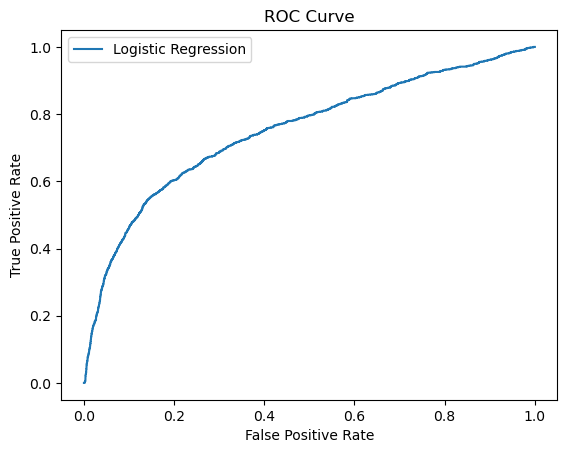

In [27]:
X = data.drop(columns=['Default_Payment'])
y = data['Default_Payment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initializing and fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


MAKING PREDICTIONS

In [29]:
#Predicting Probabilities
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Converting probabilities into binary predictions using a threshold
threshold = 0.2  # You can adjust this value
predictions = (probabilities >= threshold).astype(int)

 #Displaying predictions
print("Predicted Probabilities:", probabilities)
print("Binary Predictions:", predictions)


Predicted Probabilities: [0.20580882 0.08759359 0.21412246 ... 0.58409671 0.49340777 0.08834496]
Binary Predictions: [1 0 1 ... 1 1 0]


In [30]:
import pickle

# Save trained model
with open("loan_default_model.pkl", "wb") as f:
    pickle.dump(model, f)
